###  Revision History
31-Mar-2019    1.0    Lou Pendley    Data Science Bootcamp Unit 1 Capstone

In [131]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import seaborn as sns

In [132]:
# Let's read in the data set
DataFilePath = '../../../Datafiles'
df = pd.read_csv(DataFilePath + '/CityBikesProject3.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df['age'] = 2018 - df['birth year'] # We are calculation the age of the rider
df['distance'] = df['distance'].astype(int) # Want to do a count on the integer miles ridden
df['speed'] = df['distance']/(df['tripduration']/3600)
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] =  pd.to_datetime(df['stoptime'])
df['speed'] = df['distance']/(df['tripduration']/3600)

In [133]:
df['test'] = 0           # create the column to store the status of the treatment candidates
df['campaign_date'] = "" # Column to store the date the e-mails were sent out 
df['is_signed_up'] = 0   # Date the candidate signed up
df['signup_date'] = 0    # Set to 0 if part of control group, and 1 if part of the test group

![title](CityBikesNYCRidingPicture.png)

#  <font color='blue'>NYC Bike Share Women's Incentive</font>

We will be working with the Citi Bike data from the largest bike share program in the United States.  This dataset includes the rental information for all bike share information for New York City, including Manhattan, Brooklyn, Queens, and Jersey City.  This program encompasses 13,046 bikes, and 763 stations.  

The data presented here is from the calendar year 2018, all 12 months.  The dataset includes 1 table which came from 12 months of csv files that were appended together. There are 1,016,505 rows in the current dataset.

This 

## Setting the Stage

The NYC Bike share program is popular, and what we have noticed in the ridership is that there are 3 male riders for every 1 rider.  

We are planning to launch this with an e-mail campaign, targeting female riders, between the ages of 25 and 40.  We will offer this program to them, with the incentive for them being lower cycling fees in the bike share program.

We will be conducting this survey from within the NYC Bike Share company, knowing that it will not require large resources to conduct the campaign.


We are planning to make the ride share program more attractive for female riders, by introducing an email campaign, to give them incentives to ride more frequently.  We plan to offer this program to women, between the ages of 25 and 40, with the intent to increase the ridership.  We hope for it to grow the demand for the program.    

## Research Proposal

**The Problem**
The big question:  How can we increase the ridership for women in NYC, through the NYC BikeShare program?

Currently the women that ride in the program account for 23% of the ridership, with male riders dominant.  We are assuming that the pricing is keeping them off the bikes, and given that assumption, perhaps we can create some incentive.  We also would assume that the target market would have monthly bike share accounts, to get the full benefit of this program.

**The Potential Solution**
The solution we are suggesting is to provide bike rental incentives for women, between the ages of 25, and 40, who ride more than 100 miles a month.  This would encourage them to ride at lower rates, and to stay healthy, and get outside, and get on the bike.  Women that ride 100 miles per month could be given discounts on the montly membership.

**The Method of testing the solution**
The steps to determine if this program would entail the following steps:
1.  For women that:
     1. Have monthly bike share memberships
     1. Are between the ages of 25 and 40  
1.  Send them an e-mail offer that would:
    1. Allow them to get up to 25% off of all bike share rentals
        1. 10% off all bike rides in the month if they ride 100 miles during the month
        1. 15% off all bike rides in the month if they ride 200 miles during the month
        1. 25% off all bike rides in the month if they ride 300 miles during the month
    1. Provided they ride at least 100 miles per month
    1. Provided they maintain good standing with the NYC Bike Share program
1.  Phased Implementation - **Phase I**
    1.  First month, send out e-mails to 10% of the target market
    1.  Measure the signup rate
        1. Signup rates of 10% or greater, continue the program with the next level
        1. Lower signup rates, by the end of the first month, end the program
1.  Phased Implementation - **Phase II**
    1.  Second month, send out e-mails to 15% more of the target market
    1.  Measure the signup rate
        1. Signup rates criteria the same as for section #3
1.  Phased Implementation - **Phase III**
    1.  Third month, send out e-mails to 25% more of the target market
    1.  Measure the signup rate
        1.  Signup rates criteria the same as for section #3
1.  Phased Implementation - **Phase IV**
    1.  Fourth month, send out e-mails to the remaining 50% of the target market
    1.  Measure the effectiveness of the overall campaign.
    
## Suggestions for the campaign
1.  Conduct campaign during a conflicting campaign, or during a major national event, that could diminish the effectiveness of the measurement.
1.  Avoid starting the campaign during the Winter, or Fall.  Best time would be Spring.


In [145]:
# Gender groupings
ages25to40 = df[(df['age'] >= 25) & (df['age'] <=40)]
men  = df[(df['age'] >= 25) & (df['age'] <=40) & (df['gender']==1)]['gender'].count()
women= df[(df['age'] >= 25) & (df['age'] <=40) & (df['gender']==2)]['gender'].count()

print("Riders between 25 and 40: men = {:,}, women = {:,}, and women percentage={:0.0%}.".format(men, women, women/(men+women))) 

Riders between 25 and 40: men = 388,508, women = 116,157, and women percentage=23%.


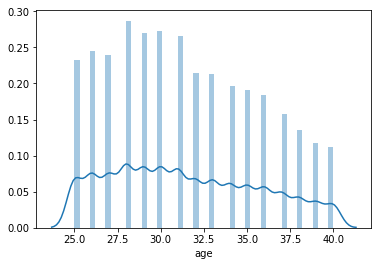

In [135]:
# Plot of women between the ages of 25 and 40, active in the NYC Bike Share program
sns.distplot(df[(df['age'] >= 25) & (df['age'] <=40) & (df['gender']==2)]['age'])

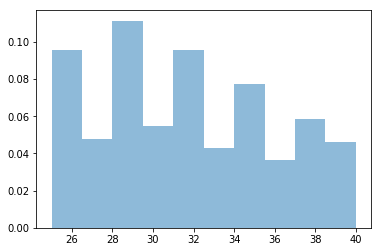

In [136]:
# sns.pairplot(ages25to40['gender', 'age'].sample(1000))
plt.hist(df[(df['age'] >= 25) & (df['age'] <=40) & (df['gender']==2)]['age'], density=True, alpha=0.5);

## What success will look like
Success will be when 10% or more of all of the candidates have signed up for the program, and have rode at least 100 miles during their first month of the program.

In [142]:
print("The initial campaign of 10%, would result in {:,} emails sent to women, between the ages of 25 and 40."
      .format(int(women*.10)))

The initial campaign of 10%, would result in 11,615 emails sent to women, between the ages of 25 and 40.


## Rollout Plan

The rollout will consist of the following:

1.  Pick 10% of the target market, women, between 25 and 40, who are in good standing with the bike share program<br></br>
2.  Flag their user account, as being a member of the test program, by setting the value to 1.<br></br>
3.  Send them an e-mail proposal for the program, how it works:
    1. If they ride:
        1. 100 miles during the month, they receive a 10% discount in the following month,
        2. 200 miles during the month, they receive a 15% discount in the following month,
        3. 300 miles during the month, they receive a 25% discount in the following month.    
    1. They must remain in good standing with the bike share program, no damaged equipment, or billing issues.<br></br>
4.  If they accept the proposal, we update their account with the signup date, and is_signup flag.<br></br>
5.  Gather the results after 1 month, to determine if:
    1.  10% of the campaign were accepted
        1.  If they have, then we continue to Phase II of the program; else we terminate here.<br></br>
6.  Pick another 15% of the target market, new candidates, similarly to step #1<br></br>
7.  Flag their user account, as being a member of the test program, by setting the value to 1.
8.  Send them an e-mail proposal for the program, similarly to step #3 above.
9.  If they accept the proposal, we update their account with the signup date, and is_signup flag.<br></br>
10. Gather the results after month 2, to determine if:
    1. 10% of all of the overall candidates have signed up.
        1.  If they have, then we continue to Phase III of the program; else we terminate here.<br></br>
11.  Pick another 25% of the target market, new candidates, similarly to step #1<br></br>
12.  2.  Flag their user account, as being a member of the test program, by setting the value to 1.<br></br>
13.  Send them an e-mail proposal for the program, similarly to step #3 above.
14.  If they accept the proposal, we update their account with the signup date, and is_signup flag.<br></br>
15.  Gather the results after 1 month, to determine if:
     1.  10% of the campaign were accepted
         1.  If they have, then we continue to the general acceptance of the program, and perform a similar process as above, except it is for the remaining 50% candiates; else we terminate here.<br></br>